In [ ]:
#自然言語処理用のgensimパッケージ
from gensim.models import KeyedVectors
file = '/content/drive/MyDrive/Colab Notebooks/chapter07/GoogleNews-vectors-negative300.bin'
#fileをword2vec形式で読み込み
model = KeyedVectors.load_word2vec_format(file,binary = True)

In [29]:
# 単語の取得
file = '/content/drive/MyDrive/Colab Notebooks/chapter07/questions-words_similarity.txt'
categories1 = ['capital-common-countries', 'capital-world']                              #2行目に国名が含まれているカテゴリ
categories2 = ['currency', 'gram6-nationality-adjective']                                #1行目に国名が含まれているカテゴリ
countries = set()                                                                        #重複削除のためにset()
with open(file, 'r', encoding='utf-8') as f:
    for row in f:                                                                        #ファイルから1行ずつ読み出し
        cols = row.strip().split('\t')                                                   #タブ区切りで単語を取得
        if cols[0] in categories1:                                                       #カテゴリ1に関する処理
            country = cols[1].split()[1]                                                 #2行目の国名を取得
            countries.add(country)                                                       #setに追加
        elif cols[0] in categories2:                                                     #カテゴリ2に関する処理
            country = cols[1].split()[0]                                                 #1行目の国名を取得
            countries.add(country)                                                       #setに追加
        else:                                                                            #カテゴリ1とカテゴリ2にふくまれていなければ何もしない
            continue
countries = list(countries)                                                              #集合を配列に変換
print(len(countries))
print(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

129
['Zambia', 'Jordan', 'Iceland', 'Spain', 'Austria', 'Hungary', 'Belize', 'Russia', 'Cyprus', 'Botswana', 'Denmark', 'Uzbekistan', 'Belarus', 'Namibia', 'Germany', 'Portugal', 'Liechtenstein', 'Kazakhstan', 'Rwanda', 'Japan', 'Gabon', 'Macedonia', 'Netherlands', 'Venezuela', 'Turkmenistan', 'Latvia', 'Tunisia', 'Morocco', 'Somalia', 'Samoa', 'Gambia', 'Bangladesh', 'Nigeria', 'Niger', 'Nepal', 'Ghana', 'Bhutan', 'Bahamas', 'Bulgaria', 'Montenegro', 'Algeria', 'Guinea', 'Ireland', 'Argentina', 'Bahrain', 'Pakistan', 'Mali', 'Egypt', 'Iran', 'Guyana', 'Israel', 'China', 'Sudan', 'Kenya', 'Angola', 'Croatia', 'Korea', 'Thailand', 'Estonia', 'Turkey', 'Philippines', 'Taiwan', 'Sweden', 'Mexico', 'Liberia', 'Qatar', 'France', 'Zimbabwe', 'Peru', 'Malaysia', 'Eritrea', 'Fiji', 'Libya', 'Norway', 'Honduras', 'Jamaica', 'Nicaragua', 'Lebanon', 'Poland', 'Azerbaijan', 'Serbia', 'Romania', 'Greenland', 'Brazil', 'Canada', 'Armenia', 'Chile', 'Switzerland', 'Burundi', 'India', 'Syria', 'Tajiki

In [37]:
from sklearn.cluster import KMeans
import numpy as np

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)                          #クラスタ数を5に設定
kmeans.fit(countries_vec)                              #作成した単語ベクトルをクラスタリング
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]         #クラスタのラベルがiのもののcontries_vecでの要素番号
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Zambia, Botswana, Namibia, Rwanda, Gabon, Tunisia, Somalia, Gambia, Nigeria, Niger, Ghana, Algeria, Guinea, Mali, Sudan, Kenya, Angola, Liberia, Zimbabwe, Eritrea, Burundi, Malawi, Mauritania, Uganda, Madagascar, Mozambique, Senegal
cluster 1
Jordan, Japan, Morocco, Bangladesh, Nepal, Bhutan, Bahrain, Pakistan, Egypt, Israel, China, Korea, Thailand, Philippines, Taiwan, Qatar, Malaysia, Fiji, Libya, Lebanon, Canada, India, Syria, Afghanistan, USA, Vietnam, Oman, Laos, Indonesia, Cambodia, Australia, Iraq
cluster 2
Belize, Venezuela, Samoa, Bahamas, Argentina, Guyana, Mexico, Peru, Honduras, Jamaica, Nicaragua, Brazil, Chile, Ecuador, Dominica, Suriname, Cuba, Tuvalu, Colombia, Uruguay
cluster 3
Russia, Uzbekistan, Belarus, Kazakhstan, Turkmenistan, Iran, Azerbaijan, Armenia, Tajikistan, Moldova, Kyrgyzstan, Ukraine
cluster 4
Iceland, Spain, Austria, Hungary, Cyprus, Denmark, Germany, Portugal, Liechtenstein, Macedonia, Netherlands, Latvia, Bulgaria, Montenegro, Ireland, Croat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


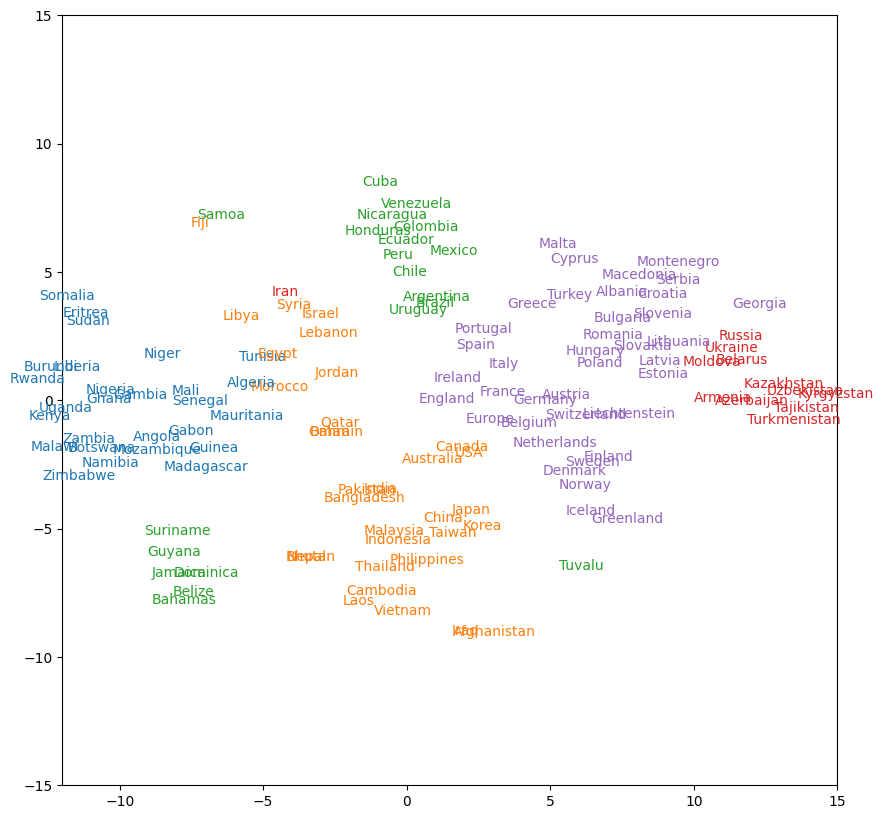

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=64)                                #t-SNEのインスタンスを作成
X_reduced = tsne.fit_transform(np.array(countries_vec))                     #次元削減処理
plt.figure(figsize=(10, 10))
for x, country, color in zip(X_reduced, countries, kmeans.labels_):
    plt.text(x[0], x[1], country, color='C{}'.format(color))                #引数は(x座標,y座標,テキスト)
plt.xlim([-12, 15])
plt.ylim([-15, 15])
plt.savefig('fig69.png')
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
